### ■ 직업, 직업별 토탈 월급을 출력하시오

### ※ 문제79. 부서위치, 부서위치별 토탈월급을 출력하시오

In [4]:
getwd()

[1] "D:/R"

In [15]:
dept=read.csv('dept.csv', header=T)
x=merge(emp, dept, by='deptno',all=T)
aggregate(sal~loc, x, sum, na.action = na.pass) # na.pass를 작성해야 NA값도 출력

loc,sal
BOSTON,NA
CHICAGO,9400
DALLAS,10875
NEW YORK,8750


In [11]:
attach(x)

The following objects are masked from x (pos = 3):

    comm, deptno, dname, empno, ename, hiredate, index, job, loc, mgr,
    sal

The following objects are masked from x (pos = 4):

    comm, deptno, dname, empno, ename, hiredate, index, job, loc, mgr,
    sal



In [14]:
data.frame(부서위치별=tapply(sal, loc, sum))

,부서위치별
BOSTON,NA
CHICAGO,9400
DALLAS,10875
NEW YORK,8750


### ※ 문제80. 부서명, 부서명별 평균월급을 출력하시오

In [25]:
x2=aggregate(sal~dname, x, mean, na.action=na.pass)
x2$sal=round(x2$sal)
x2

dname,sal
ACCOUNTING,2917
OPERATIONS,NA
RESEARCH,2175
SALES,1567


### ※ 문제81. 위의 결과를 막대그래프로 시각화하시오
```R
barplot으로 막대그래프를 그릴때는 가로로 출력한 데이터가 필요
```

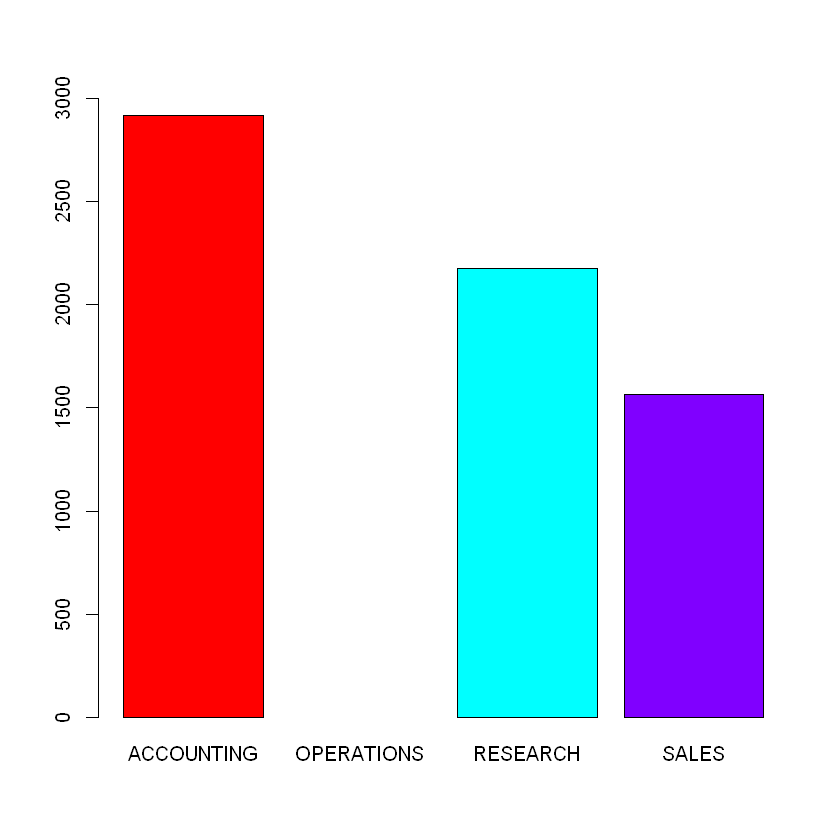

In [28]:
x3=tapply(x$sal, x$dname,mean)
barplot(x3,ylim=c(0,3000),col=rainbow(4) )

### ※ 문제82. 위의 결과를 구글 막대 그래프로 그리시오

In [29]:
library(googleVis)

Warning message:
"package 'googleVis' was built under R version 3.6.3"Creating a generic function for 'toJSON' from package 'jsonlite' in package 'googleVis'

Welcome to googleVis version 0.6.5

Please read Google's Terms of Use
before you start using the package:
https://developers.google.com/terms/

Note, the plot method of googleVis will by default use
the standard browser to display its output.

See the googleVis package vignettes for more details,
or visit https://github.com/mages/googleVis.

To suppress this message use:
suppressPackageStartupMessages(library(googleVis))



In [31]:
x3=data.frame(x2)
x4=gvisBarChart(x3)
plot(x4)

starting httpd help server ... done


### ※ 문제83. 아래와 같이 결과를 출력하시오
```
           1980 1981 1982 1983

BOSTON     NA   NA    NA   NA

CHICAGO    NA  9400   NA   NA

DALLAS     800  5975   3000 1100

NEW YORK   NA  7450  1300   NA
```


In [33]:
library(lubridate)

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



In [36]:
# year(x$hiredate) : lubridate package library
tapply(x$sal,list(x$loc,year(x$hiredate)),sum)

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."

,1980,1981,1982,1983
BOSTON,NA,NA,NA,NA
CHICAGO,NA,9400,NA,NA
DALLAS,800,5975,3000,1100
NEW YORK,NA,7450,1300,NA


### ※ 문제84. 위의 결과를 다시 출력하는데 NA를 0으로 출력되게 하시오

In [42]:
rs=tapply(x$sal,list(x$loc,year(x$hiredate)),sum)
rs[is.na(rs)]=0 # is.na(rs)가 true인 곳에 0으로 치환
rs

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."

,1980,1981,1982,1983
BOSTON,0,0,0,0
CHICAGO,0,9400,0,0
DALLAS,800,5975,3000,1100
NEW YORK,0,7450,1300,0


### ※ 문제85. 위의 결과를 막대그래프로 시각화하시오

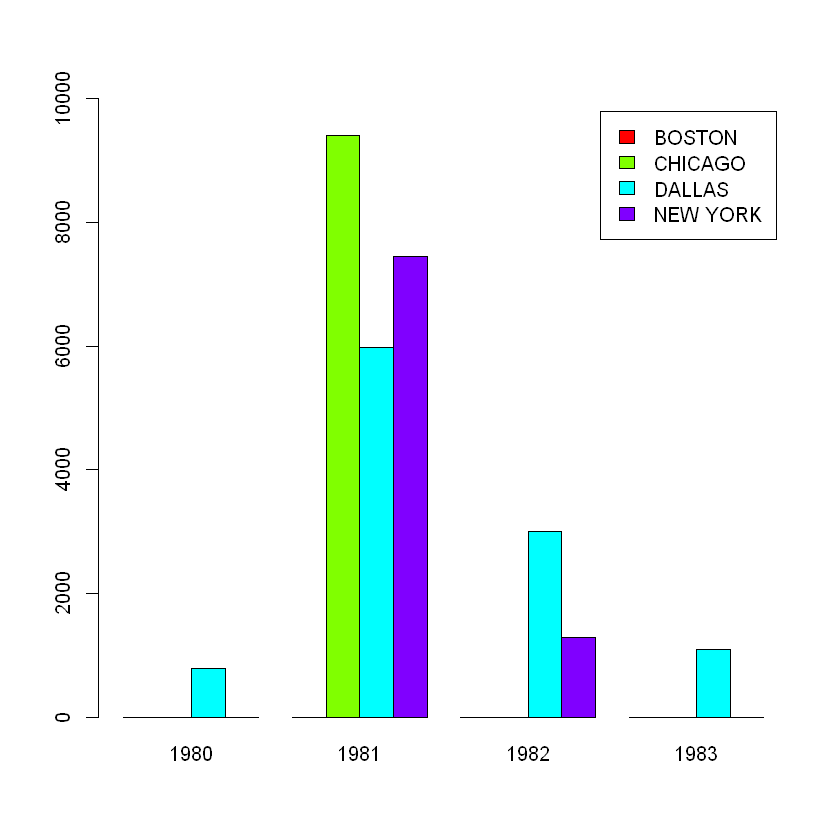

In [52]:
barplot(rs, ylim=c(0,10000),col=rainbow(4), beside=T,legend=rownames(rs))
# x= topright : 오른쪽 위로 이동
# bty='n', legend의 box선 출력 X
# inset = c(-0.1,0) legend의 좌표

### ※ 문제86. 부서위치별 직업별 토탈월급을 막대그래프로 시각화 하시오

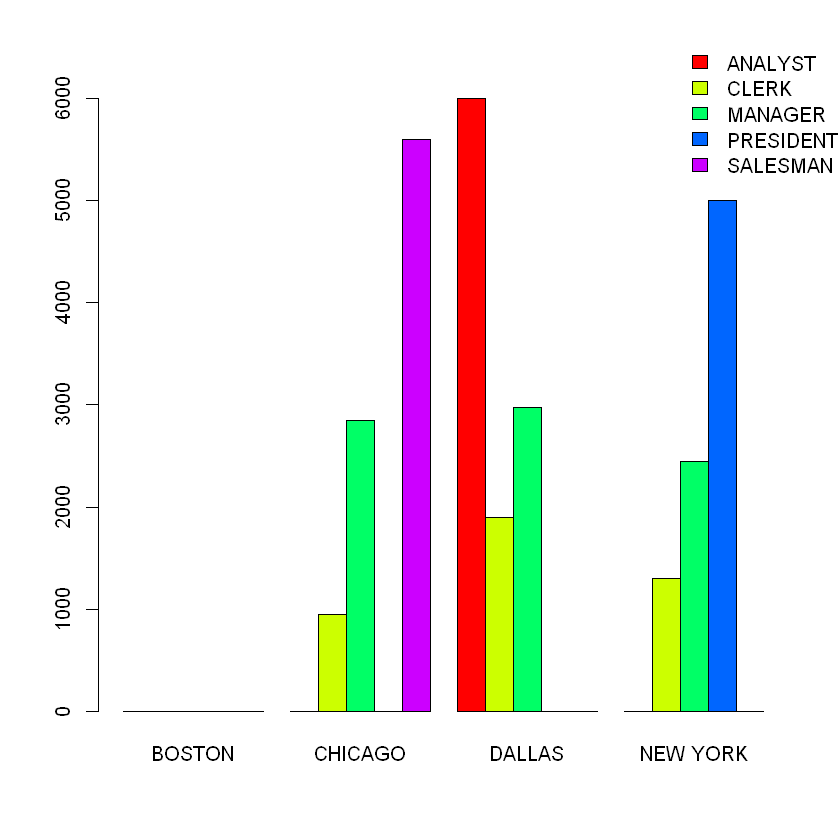

In [65]:
rs=tapply(x$sal,list(x$job,x$loc),sum)
rs[is.na(rs)]=0
barplot(rs, col=rainbow(5), beside=T, legend=rownames(rs), args.legend = list(x='topright',bty='n',inset=c(-0.1,-0.1)))

In [3]:
library(googleVis)

Warning message:
"package 'googleVis' was built under R version 3.6.3"Creating a generic function for 'toJSON' from package 'jsonlite' in package 'googleVis'

Welcome to googleVis version 0.6.5

Please read Google's Terms of Use
before you start using the package:
https://developers.google.com/terms/

Note, the plot method of googleVis will by default use
the standard browser to display its output.

See the googleVis package vignettes for more details,
or visit https://github.com/mages/googleVis.

To suppress this message use:
suppressPackageStartupMessages(library(googleVis))



In [1]:
line=read.csv('1-4호선승하차승객수.csv',header=T)
line
# line_no : 호선, time: 승하차시간, in: 승차인원수, out: 하차인원수

line_no,time,in.,out
line_1,506,88136,35394
line_1,607,114628,195028
line_1,708,259282,483162
line_1,809,384892,1165703
line_1,910,315797,791704
line_1,1011,340972,585759
line_1,1112,411897,570545
line_1,1213,471989,577067
line_1,1314,558377,625046
line_1,1415,589343,614026


In [4]:
t1 <- gvisMotionChart(line, idvar="line_no", timevar="time")
plot(t1)

starting httpd help server ... done


In [5]:
line2=read.csv('서울지하철_5-8호선_이용현황_시간대별.csv',header=T)
line2

호선명,시간,승차인원,하차인원
5호선,506,7992,1547
5호선,607,18445,10611
5호선,708,58566,29023
5호선,809,69908,80276
5호선,910,35972,38304
5호선,1011,28855,24063
5호선,1112,30201,24261
5호선,1213,32664,26334
5호선,1314,35202,29536
5호선,1415,36012,32296


In [6]:
t2 = gvisMotionChart(line2, idvar="호선명", timevar="시간")
plot(t2)